In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

In [14]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [15]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [16]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [17]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [19]:
import os
os.environ['TF_XLA_FLAGS'] = ''


In [33]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5


2023-11-27 17:19:25.331922: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-27 17:19:25.333607: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-11-27 17:19:25.367898: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-27 17:19:25.369765: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-11-27 17:19:25.406325: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-27 17:19:25.408019: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 

InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_8 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/users/amindahi88/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/users/amindahi88/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_28078/2860590301.py", line 1, in <module>

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_8}}]] [Op:__inference_train_function_3955]

In [21]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 2.3267 - accuracy: 0.0905


[2.326702117919922, 0.09049999713897705]

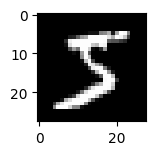

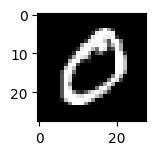

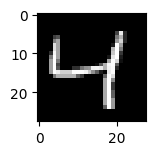

In [22]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [23]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['assets', 'fingerprint.pb', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [24]:
lenet_5_model.save("my.h5")

/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
lenet_5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [26]:
json_model = lenet_5_model.to_json()

In [27]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [28]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [29]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.02736323,  0.00761652, -0.06042258, -0.11733083,
           0.15473486, -0.14043272]],

        [[ 0.08822767, -0.0809098 ,  0.11434187, -0.03277135,
           0.06226803, -0.02528776]],

        [[-0.11062245, -0.07457243,  0.1806394 , -0.06388301,
          -0.05639076, -0.10350621]],

        [[ 0.12799324,  0.10503177,  0.04696296, -0.08113662,
           0.14684324,  0.11218776]],

        [[ 0.03715947, -0.10444503, -0.00994599, -0.09019854,
           0.10241129, -0.14473766]]],


       [[[ 0.1492136 , -0.17452404, -0.04958646, -0.1301193 ,
          -0.14736637, -0.00927131]],

        [[ 0.05519219, -0.13114649,  0.04945993, -0.09180688,
           0.11636998,  0.06732185]],

        [[ 0.11011471,  0.09740533, -0.1764928 ,  0.08263178,
          -0.17039338, -0.0816538 ]],

        [[-0.05287153,  0.06980412,  0.07944833,  0.15623192,
           0.04346134, -0.07403044]],

        [[-0.01549622, -0.08995732,  0.18113075, -0.12933798,
           0.15831302,  0.0